In [2]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)

In [3]:
breast_cancer = pd.read_csv('./breast_cancer_data/breast-cancer-diagnostic.shuf.lrn.csv', delimiter=',')

In [4]:
breast_cancer.head()

,ID,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,radiusStdErr,textureStdErr,perimeterStdErr,areaStdErr,smoothnessStdErr,compactnessStdErr,concavityStdErr,concavePointsStdErr,symmetryStdErr,fractalDimensionStdErr,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,886452,True,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,0.06130,0.4250,0.8098,2.563,35.74,0.006351,0.02679,0.03119,0.01342,0.02062,0.002695,16.39,22.07,108.10,826.0,0.1512,0.3262,0.3209,0.1374,0.3068,0.07957
1,84348301,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
2,9012795,True,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,0.06183,0.3414,1.3090,2.407,39.06,0.004426,0.02675,0.03437,0.01343,0.01675,0.004367,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.4024,0.1966,0.2730,0.08666
3,894326,True,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.07950,0.1807,0.05664,0.4041,0.5503,2.547,48.90,0.004821,0.01659,0.02408,0.01143,0.01275,0.002451,21.84,25.00,140.90,1485.0,0.1434,0.2763,0.3853,0.1776,0.2812,0.08198
4,867387,False,15.71,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,0.1816,0.05723,0.3117,0.8155,1.972,27.94,0.005217,0.01515,0.01678,0.01268,0.01669,0.002330,17.50,19.25,114.30,922.8,0.1223,0.1949,0.1709,0.1374,0.2723,0.07071


This data set has information about cancer patients. We want to predict based on different characteristic if a patient has a "recurrence-events" or "no-recurrence-events", which translates into the target variables being True or False.
Binary classification

In [5]:
breast_cancer.shape

(285, 32)

In [6]:
# Preprocessing the data by checking for missing values
if breast_cancer.isnull().sum().sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There is a missing value in the dataset.")

# Check for duplicate rows
if breast_cancer.duplicated().sum() == 0:
    print("There are no duplicate rows in the dataset.")

# Check for duplicate columns
if breast_cancer.columns.duplicated().sum() == 0:
    print("There are no duplicate columns in the dataset.")

There are no missing values in the dataset.
There are no duplicate rows in the dataset.
There are no duplicate columns in the dataset.


In [7]:
breast_cancer.columns

Index(['ID', 'class', 'radiusMean', ' textureMean', ' perimeterMean',
       ' areaMean', ' smoothnessMean', ' compactnessMean', ' concavityMean',
       ' concavePointsMean', ' symmetryMean', ' fractalDimensionMean',
       ' radiusStdErr', ' textureStdErr', ' perimeterStdErr', ' areaStdErr',
       ' smoothnessStdErr', ' compactnessStdErr', ' concavityStdErr',
       ' concavePointsStdErr', ' symmetryStdErr', ' fractalDimensionStdErr',
       ' radiusWorst', ' textureWorst', ' perimeterWorst', ' areaWorst',
       ' smoothnessWorst', ' compactnessWorst', ' concavityWorst',
       ' concavePointsWorst', ' symmetryWorst', ' fractalDimensionWorst'],
      dtype='object')

In [28]:
# Remove empty spaces from columns' names
breast_cancer.columns = breast_cancer.columns.str.replace(' ', '')

In [8]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       285 non-null    int64  
 1   class                    285 non-null    bool   
 2   radiusMean               285 non-null    float64
 3    textureMean             285 non-null    float64
 4    perimeterMean           285 non-null    float64
 5    areaMean                285 non-null    float64
 6    smoothnessMean          285 non-null    float64
 7    compactnessMean         285 non-null    float64
 8    concavityMean           285 non-null    float64
 9    concavePointsMean       285 non-null    float64
 10   symmetryMean            285 non-null    float64
 11   fractalDimensionMean    285 non-null    float64
 12   radiusStdErr            285 non-null    float64
 13   textureStdErr           285 non-null    float64
 14   perimeterStdErr         2

In [9]:
breast_cancer.dtypes.unique()

array([dtype('int64'), dtype('bool'), dtype('float64')], dtype=object)

In [10]:
breast_cancer.describe()

,ID,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,radiusStdErr,textureStdErr,perimeterStdErr,areaStdErr,smoothnessStdErr,compactnessStdErr,concavityStdErr,concavePointsStdErr,symmetryStdErr,fractalDimensionStdErr,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
count,2.850000e+02,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,2.575517e+07,13.946439,19.376246,90.756842,637.428772,0.096595,0.104231,0.085204,0.047139,0.179774,0.062954,0.388641,1.231957,2.772301,37.264077,0.007000,0.025400,0.030672,0.011678,0.020602,0.003681,16.038446,25.909614,105.767088,854.987719,0.132928,0.253865,0.266263,0.112879,0.287262,0.083770
std,1.073900e+08,3.488308,4.278841,24.062045,340.172969,0.014748,0.055230,0.077423,0.038661,0.029706,0.007533,0.227909,0.517552,1.724574,32.905491,0.002830,0.017617,0.022964,0.005745,0.008626,0.002234,4.785408,6.101124,33.468918,550.723964,0.025036,0.165161,0.210121,0.067894,0.062336,0.019355
min,8.913000e+03,7.691000,9.710000,47.980000,170.400000,0.062510,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.387100,0.873000,6.802000,0.002838,0.002252,0.000000,0.000000,0.010550,0.000895,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.000000,0.000000,0.156600,0.055210
25%,8.688710e+05,11.510000,16.390000,73.990000,406.300000,0.085880,0.065450,0.029870,0.018990,0.160100,0.057640,0.236700,0.873200,1.648000,18.210000,0.005042,0.013080,0.015850,0.007807,0.015030,0.002128,12.840000,21.590000,82.980000,506.200000,0.114800,0.143200,0.111700,0.062960,0.248200,0.070550
50%,9.051890e+05,13.140000,18.900000,85.240000,530.600000,0.095970,0.087510,0.054850,0.031100,0.177600,0.061710,0.319800,1.130000,2.289000,23.810000,0.006418,0.020080,0.026150,0.010830,0.018680,0.003107,14.730000,25.340000,96.090000,656.700000,0.131200,0.205300,0.193200,0.092650,0.279000,0.079440
75%,8.812816e+06,15.500000,21.840000,102.800000,747.200000,0.105900,0.128400,0.115500,0.067720,0.194300,0.065780,0.446700,1.478000,3.195000,41.240000,0.008124,0.032880,0.040290,0.014630,0.023480,0.004583,18.130000,29.940000,123.500000,1030.000000,0.148300,0.325300,0.385300,0.166300,0.315700,0.091800
max,9.112962e+08,25.730000,39.280000,174.200000,2010.000000,0.163400,0.345400,0.426400,0.191300,0.304000,0.097440,1.370000,3.896000,11.070000,176.500000,0.021770,0.135400,0.153500,0.040900,0.078950,0.017920,33.130000,44.870000,229.300000,3234.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


We don't have any missing values and our variables are mostly of type float (Ratio), with only the target variable being a boolean (Categorical - Binary) and the ID being an integer (Nominal) \n
We can also see that the variables are in different scales, for example, the mean of 'areaMean' is around 637 and the mean of ConcavityMean is around 0.085, which may need to be fixed on the preprocessing

In [11]:
breast_cancer['class'].value_counts()

class
False    188
True      97
Name: count, dtype: int64

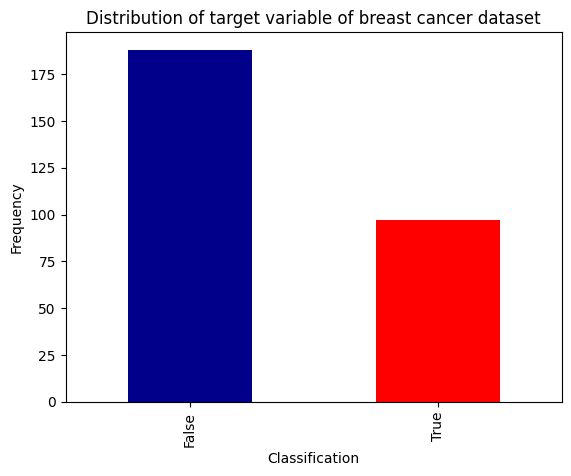

In [12]:
# Plot target variable
breast_cancer['class'].value_counts().plot(kind='bar', color=['darkblue', 'red', 'skyblue'])
# Adding title and labels
plt.title("Distribution of target variable of breast cancer dataset")
plt.xlabel('Classification')
plt.ylabel('Frequency')

# Show the plot
plt.show()

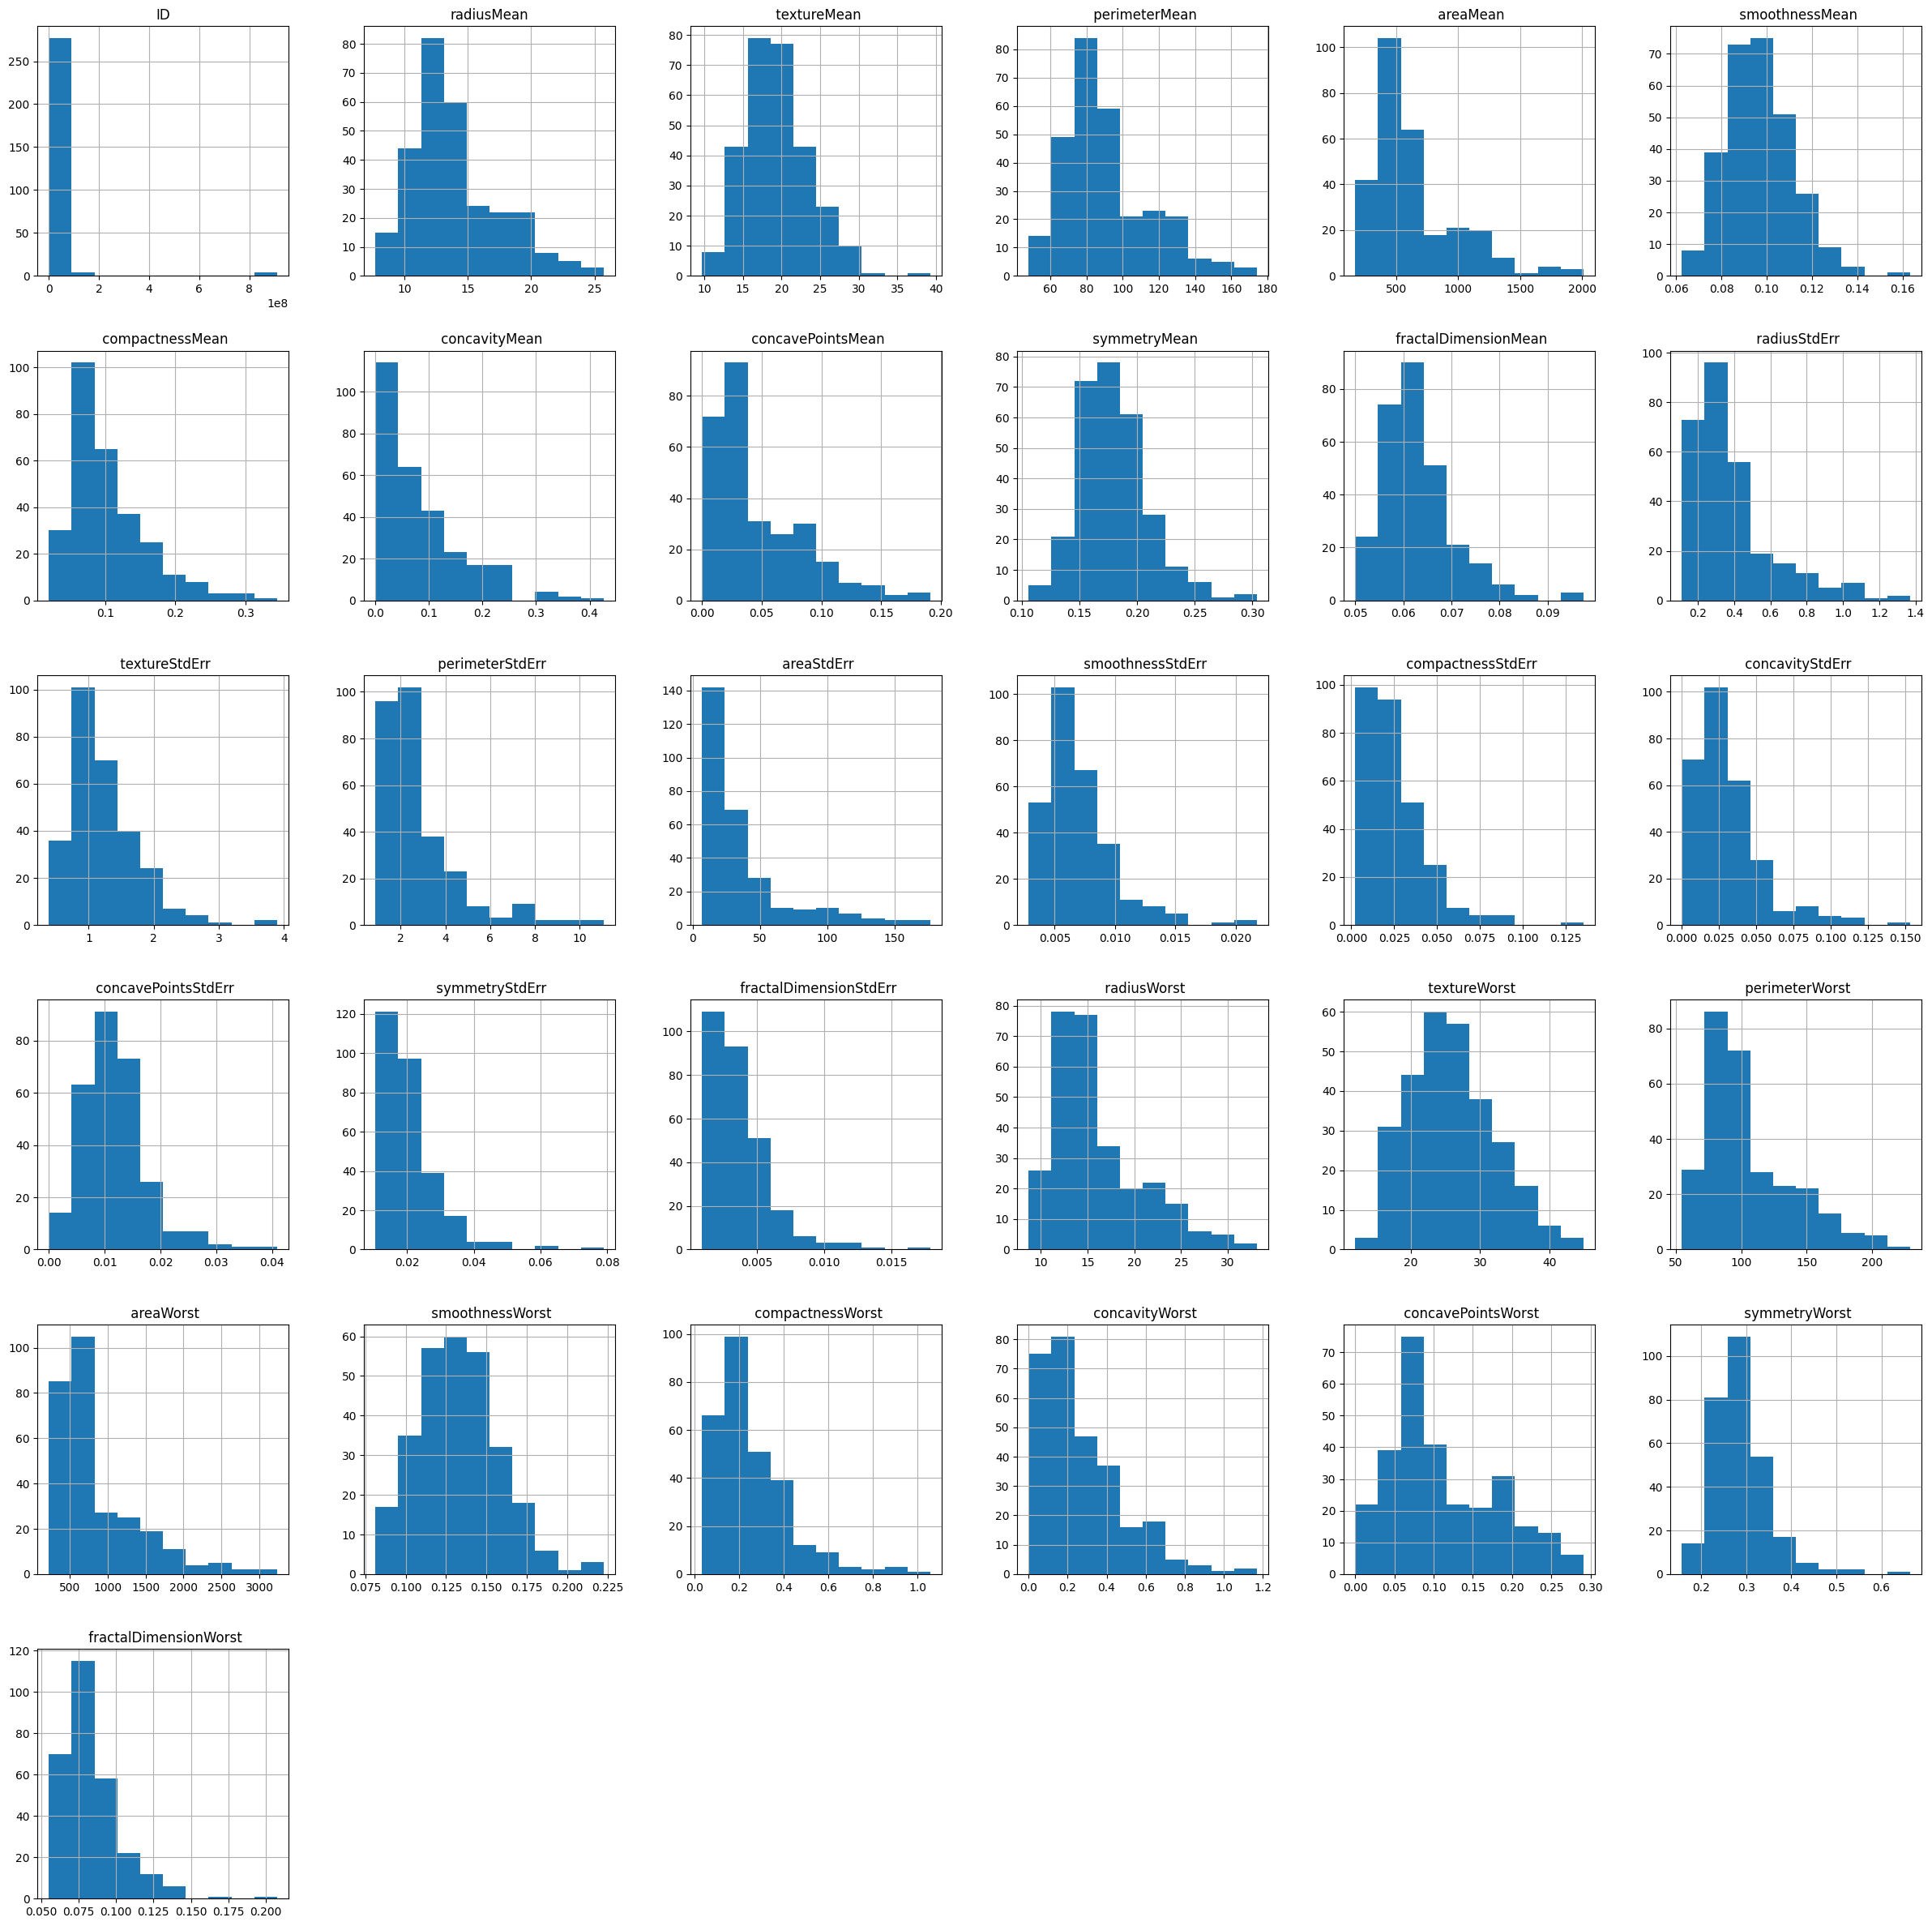

In [13]:
breast_cancer.hist(figsize=(30, 30))
plt.show()

Firstly, we replace the values of our target variable to be 1, when Class=True, and 0, when Class=False.

In [14]:
breast_cancer['class'].replace({True: 1, False: 0}, inplace=True)

C:\Users\marga\AppData\Local\Temp\ipykernel_13960\4141336050.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_cancer['class'].replace({True: 1, False: 0}, inplace=True)
C:\Users\marga\AppData\Local\Temp\ipykernel_13960\4141336050.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breast_c

In [15]:
breast_cancer

,ID,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,radiusStdErr,textureStdErr,perimeterStdErr,areaStdErr,smoothnessStdErr,compactnessStdErr,concavityStdErr,concavePointsStdErr,symmetryStdErr,fractalDimensionStdErr,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,886452,1,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,0.06130,0.4250,0.8098,2.563,35.74,0.006351,0.02679,0.03119,0.013420,0.02062,0.002695,16.39,22.07,108.10,826.0,0.1512,0.3262,0.3209,0.13740,0.3068,0.07957
1,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
2,9012795,1,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,0.06183,0.3414,1.3090,2.407,39.06,0.004426,0.02675,0.03437,0.013430,0.01675,0.004367,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.4024,0.19660,0.2730,0.08666
3,894326,1,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.07950,0.1807,0.05664,0.4041,0.5503,2.547,48.90,0.004821,0.01659,0.02408,0.011430,0.01275,0.002451,21.84,25.00,140.90,1485.0,0.1434,0.2763,0.3853,0.17760,0.2812,0.08198
4,867387,0,15.71,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,0.1816,0.05723,0.3117,0.8155,1.972,27.94,0.005217,0.01515,0.01678,0.012680,0.01669,0.002330,17.50,19.25,114.30,922.8,0.1223,0.1949,0.1709,0.13740,0.2723,0.07071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,911150,0,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,0.05746,0.2535,1.3540,1.994,23.04,0.004147,0.02048,0.03379,0.008848,0.01394,0.002327,16.30,28.39,108.10,830.5,0.1089,0.2649,0.3779,0.09594,0.2471,0.07463
281,857156,0,13.49,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,0.05718,0.2338,1.3530,1.735,20.20,0.004455,0.01382,0.02095,0.011840,0.01641,0.001956,15.15,31.82,99.00,698.8,0.1162,0.1711,0.2282,0.12820,0.2871,0.06917
282,8910251,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.03581,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.1916,0.07926,0.2940,0.07587
283,8910499,0,13.59,21.84,87.16,561.0,0.07956,0.08259,0.04072,0.02142,0.1635,0.05859,0.3380,1.9160,2.591,26.76,0.005436,0.02406,0.03099,0.009919,0.02030,0.003009,14.80,30.04,97.66,661.5,0.1005,0.1730,0.1453,0.06189,0.2446,0.07024


<Axes: >

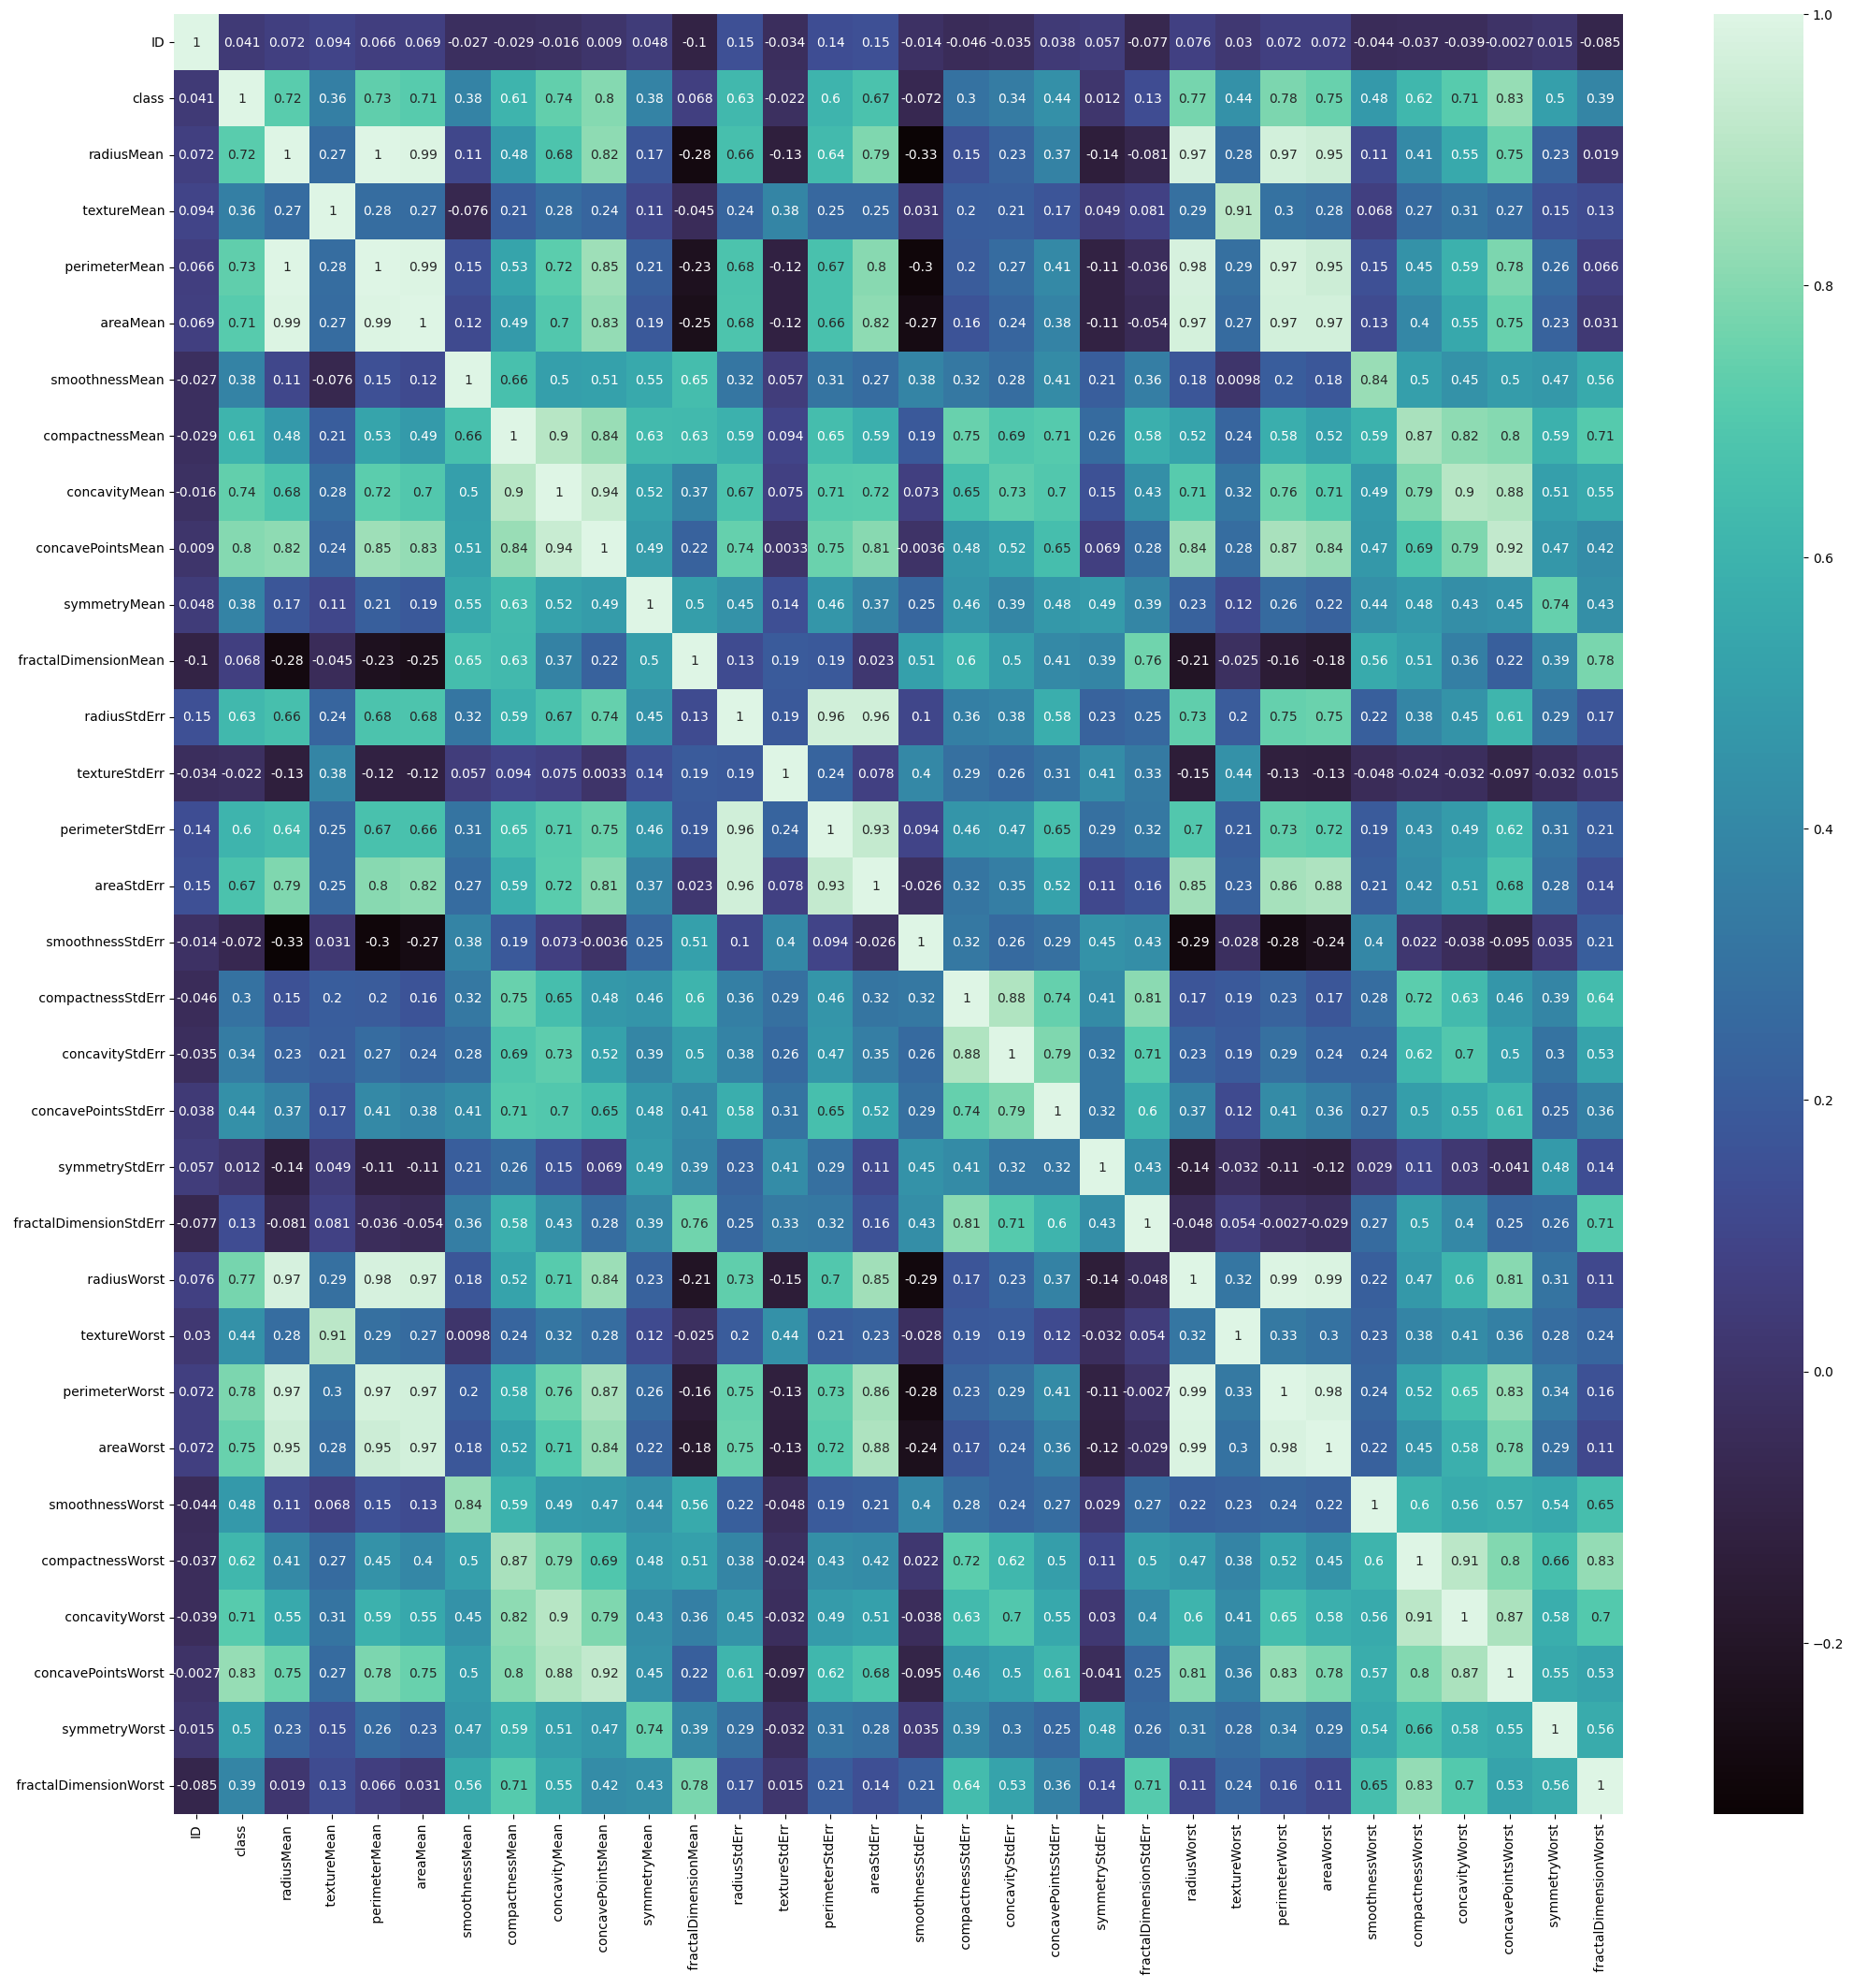

In [16]:
correlation = breast_cancer.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation, annot=True, cmap='mako')

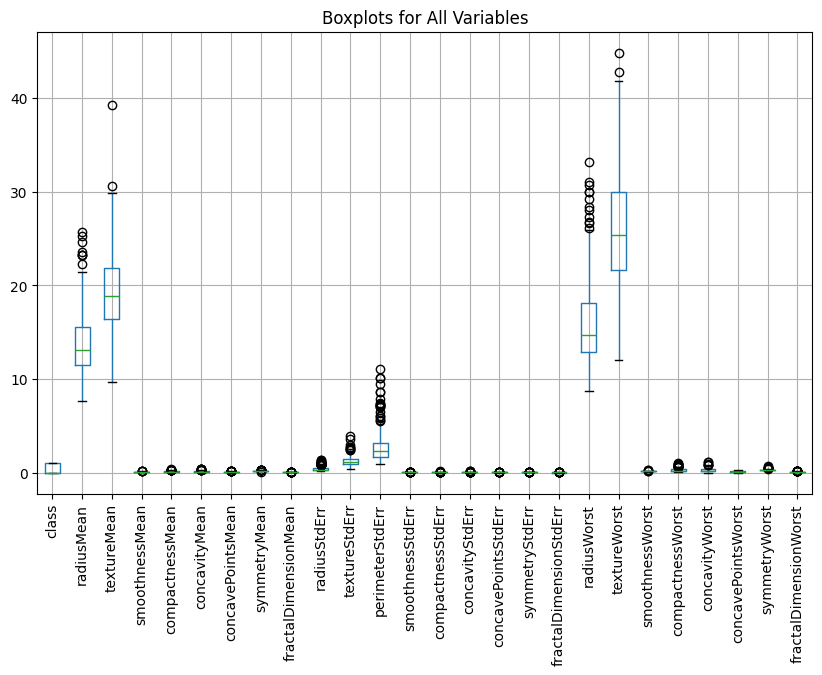

In [31]:
breast_cancer.drop(columns=['ID','areaMean', 'areaWorst','perimeterMean', 'areaStdErr', 'perimeterWorst']).boxplot(figsize=(10, 6))
plt.title("Boxplots for All Variables")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

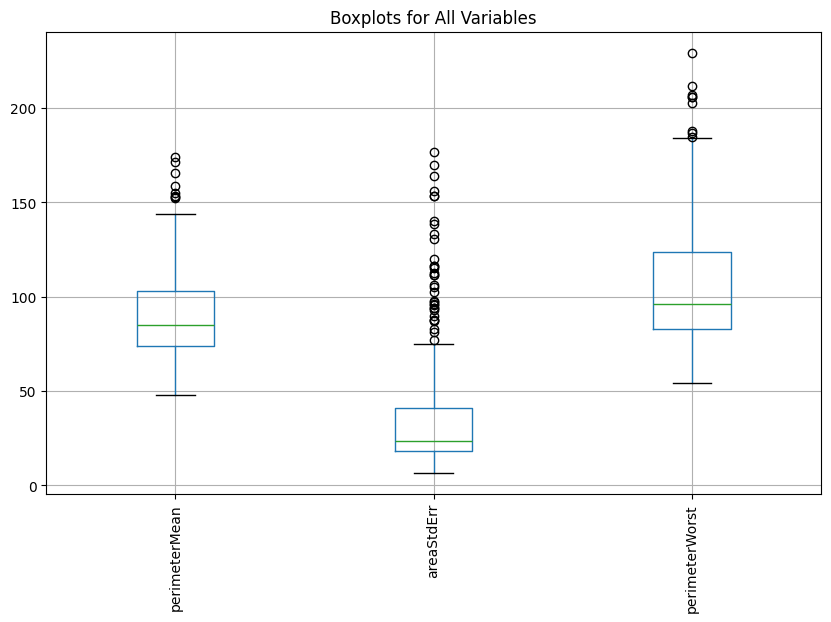

In [32]:
breast_cancer[['perimeterMean', 'areaStdErr', 'perimeterWorst']].boxplot(figsize=(10, 6))
plt.title("Boxplots for All Variables")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

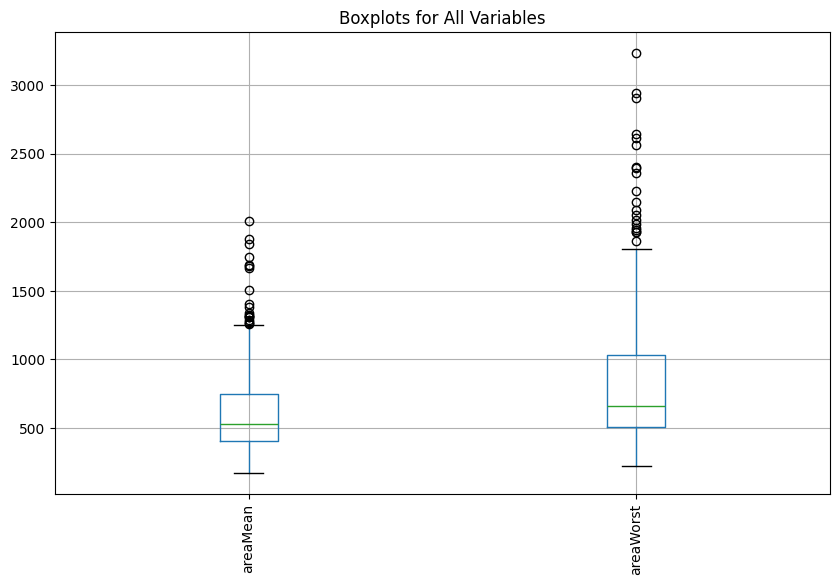

In [30]:
breast_cancer[['areaMean', 'areaWorst']].boxplot(figsize=(10, 6))
plt.title("Boxplots for All Variables")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()